In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
header_file = open('assets/header.txt','r')
text = header_file.read()
text

'CPL_wrt_BC,\nclient_state,\nduration,\nnum_prods,\ncalls,\nCPL_wrt_self,\nchurn,\navg_budget,\nBC,\nclicks,\n'

In [3]:
header = text.split(',\n')[:-1]
header

['CPL_wrt_BC',
 'client_state',
 'duration',
 'num_prods',
 'calls',
 'CPL_wrt_self',
 'churn',
 'avg_budget',
 'BC',
 'clicks']

In [4]:
# load data
df = pd.read_csv('assets/data.csv',names=header)
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [8]:
df = df.fillna(value=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    10000 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [9]:
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,0.000000,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [10]:
# for categorical variables
df = pd.get_dummies(df,columns=['client_state','BC'])
df.head()


,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks,client_state_AK,client_state_AL,...,BC_Industrial & Commercial,"BC_Personal Services (Weddings, Cleaners, etc.)",BC_Physicians & Surgeons,BC_Real Estate,BC_Religion & Spirituality,BC_Restaurants & Food,"BC_Shopping, Collectibles & Gifts (General)",BC_Sports & Recreation,BC_Toys & Hobbies,BC_Travel
0,0.000000,73,6,2,0.000000,1,10082.152554,107,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.623618,1,1,3,0.000000,0,133.928571,79,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.007905,102,2,8,-0.292008,0,3935.017462,90,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.104900,6,1,5,0.587206,0,461.538462,112,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.013057,34,1,6,-0.955335,1,314.705882,95,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 90 columns):
CPL_wrt_BC                                         10000 non-null float64
duration                                           10000 non-null int64
num_prods                                          10000 non-null int64
calls                                              10000 non-null int64
CPL_wrt_self                                       10000 non-null float64
churn                                              10000 non-null int64
avg_budget                                         10000 non-null float64
clicks                                             10000 non-null int64
client_state_AK                                    10000 non-null uint8
client_state_AL                                    10000 non-null uint8
client_state_AR                                    10000 non-null uint8
client_state_AZ                                    10000 non-null uint8
client_state_CA       

In [168]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [14]:
x = df.drop('churn',1)
x.head()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,avg_budget,clicks,client_state_AK,client_state_AL,client_state_AR,...,BC_Industrial & Commercial,"BC_Personal Services (Weddings, Cleaners, etc.)",BC_Physicians & Surgeons,BC_Real Estate,BC_Religion & Spirituality,BC_Restaurants & Food,"BC_Shopping, Collectibles & Gifts (General)",BC_Sports & Recreation,BC_Toys & Hobbies,BC_Travel
0,0.000000,73,6,2,0.000000,10082.152554,107,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.623618,1,1,3,0.000000,133.928571,79,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.007905,102,2,8,-0.292008,3935.017462,90,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.104900,6,1,5,0.587206,461.538462,112,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.013057,34,1,6,-0.955335,314.705882,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = df['churn']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: churn, dtype: int64

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 89 columns):
CPL_wrt_BC                                         10000 non-null float64
duration                                           10000 non-null int64
num_prods                                          10000 non-null int64
calls                                              10000 non-null int64
CPL_wrt_self                                       10000 non-null float64
avg_budget                                         10000 non-null float64
clicks                                             10000 non-null int64
client_state_AK                                    10000 non-null uint8
client_state_AL                                    10000 non-null uint8
client_state_AR                                    10000 non-null uint8
client_state_AZ                                    10000 non-null uint8
client_state_CA                                    10000 non-null uint8
client_state_CO       

In [16]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=9)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8000, 89) (8000,)
(2000, 89) (2000,)


In [158]:
from sklearn.preprocessing import MinMaxScaler

# Normalize using MinMaxScaler to constrain values to between 0 and 1.

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [100]:
def model_accuracy(model, X_test, Y_test):
    # accuracy
    acc = model.score(X_test, Y_test) 
    print('Accuracy: ' , acc)
    
    # prediction
    ypred = model.predict(X_test)
    
    # confusion matrix
    cm = confusion_matrix(Y_test,ypred,labels=[0,1])
    print('Confusion matrix:')    
    print(cm)
    
    # Area Under the Receiver Operating Characteristic Curve
    roc = roc_auc_score(Y_test, ypred)
    print('ROC: ' , roc)
    
    print(classification_report(Y_test, ypred))

In [159]:
def decision_threshold(clf, X, cutoff=.5):
    ''' Adjusts the decision cutoff for sklearn classifier predictions
    
    Parameters: 
    clf -- an sklearn classifier object
    X -- a numpy array of unlabeled data
    cutoff --  a float between 0 and 1
    
    Returns:
    a numpy array of binary predictions
    '''
    probs = clf.predict_proba(X)
    count = []
    for prob in probs:
        if prob[1] > cutoff:
            count.append(1)
        else:
            count.append(0)
    return np.array(count)

In [162]:
def threshold_search(clf, X, y, min_recall=.51, step=.01):
    ''' binary search for decision cutoff
    
    Parameters:
    clf -- sklearn classifier object
    X -- numpy array of unlabeled data
    y -- numpy array of true labels for the data
    min_recall -- float between 0 and 1
    step -- float
    
    Returns:
    float
    '''
    guess = .5
    epsilon = .01
    
    last_guess = 0
    low_guess = 0.
    high_guess = 1.
    
    while abs(guess - last_guess) > epsilon:
        last_guess = guess
        step_up = guess + step
        step_down = guess - step
        
        pred = decision_threshold(clf, X, guess)
        uppred = decision_threshold(clf, X, step_up)
        downpred = decision_threshold(clf, X, step_down)
        
        guess_recall = recall_score(y, pred)
        up_recall = recall_score(y, uppred)
        down_recall = recall_score(y, downpred)
        
        guess_precision = precision_score(y, pred)
        up_precision = precision_score(y, uppred)
        down_precision = precision_score(y, downpred)
        
        if guess_recall <= min_recall:
            if guess_recall < up_recall:
                low_guess = guess
                guess = (guess + high_guess)/2. 
            elif guess_recall < down_recall:
                high_guess = guess
                guess = (guess + low_guess)/2.
        elif guess_recall > min_recall:
            if guess_precision < up_precision:
                low_guess = guess
                guess = (guess + high_guess)/2.
            elif guess_precision < down_precision:
                high_guess = guess
                guess = (guess + low_guess)/2.
    return guess

In [163]:
def linear_threshold_search(clf, X, y, min_recall=.51):
    ''' linear search for decision cutoff
    
    Parameters:
    clf -- sklearn classifier object
    X -- numpy array of unlabeled data
    y -- numpy array of true labels for the data
    min_recall -- float between 0 and 1
    
    Returns:
    float 
    '''
    result = 0.
    max_precision = 0.
    for n in range(0, 101):
        n = n/100.
        pred = decision_threshold(clf, X, n)
        precision = precision_score(y, pred)
        recall = recall_score(y, pred)
        if (precision > max_precision) and (recall > min_recall):
            result = n
            max_precision = precision
    return result

In [157]:
def plot_roc(model, X_test, Y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

In [17]:
# Logistic Regression
model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
model_accuracy(model_1,X_test,Y_test)

Accuracy:  0.8
Confusion matrix:
[[1600    0]
 [ 400    0]]
ROC:  0.5
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [165]:
# adjusting the decision cutoff
logit_cutoff = threshold_search(model_1, X_test, Y_test)
pred = decision_threshold(model_1, X_test, logit_cutoff)

In [169]:
accuracy_score(Y_test,pred)

0.566

In [170]:
confusion_matrix(Y_test,pred)

array([[900, 700],
       [168, 232]], dtype=int64)

In [172]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1600
           1       0.25      0.58      0.35       400

   micro avg       0.57      0.57      0.57      2000
   macro avg       0.55      0.57      0.51      2000
weighted avg       0.72      0.57      0.61      2000



In [45]:
# Logistic Regression
model_1a = LogisticRegression(class_weight='balanced')
model_1a.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [46]:
model_accuracy(model_1a,X_test,Y_test)

Accuracy:  57.45
Confusion matrix:
[[923 677]
 [174 226]]
ROC:  0.5709375
              precision    recall  f1-score   support

           0       0.84      0.58      0.68      1600
           1       0.25      0.56      0.35       400

   micro avg       0.57      0.57      0.57      2000
   macro avg       0.55      0.57      0.52      2000
weighted avg       0.72      0.57      0.62      2000



## XGBoost

In [28]:
model_2 = XGBClassifier()
model_2.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
model_accuracy(model_2,X_test,Y_test)

Accuracy:  82.75
Confusion matrix:
[[1564   36]
 [ 309   91]]
ROC:  0.6025
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1600
           1       0.72      0.23      0.35       400

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.78      0.60      0.62      2000
weighted avg       0.81      0.83      0.79      2000



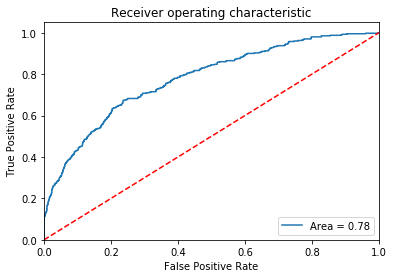

In [127]:
plot_roc(model_2,X_test,Y_test)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
model_accuracy(model_3,X_test,Y_test)

Accuracy:  75.25
Confusion matrix:
[[1348  252]
 [ 243  157]]
ROC:  0.6175
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1600
           1       0.38      0.39      0.39       400

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.75      0.75      0.75      2000



## Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_4 = RandomForestClassifier()
model_4.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
model_accuracy(model_4,X_test,Y_test)

Accuracy:  82.05
Confusion matrix:
[[1558   42]
 [ 317   83]]
ROC:  0.5906250000000001
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1600
           1       0.66      0.21      0.32       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.75      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000



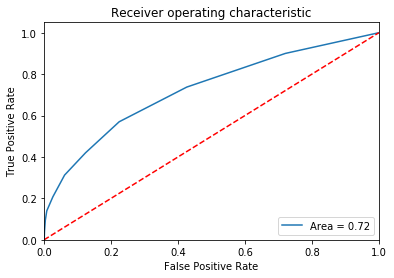

In [138]:
plot_roc(model_4,X_test,Y_test)

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model_5 = KNeighborsClassifier()
model_5.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
model_accuracy(model_5,X_test,Y_test)

Accuracy:  76.1
Confusion matrix:
[[1487  113]
 [ 365   35]]
ROC:  0.5084375
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1600
           1       0.24      0.09      0.13       400

   micro avg       0.76      0.76      0.76      2000
   macro avg       0.52      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000



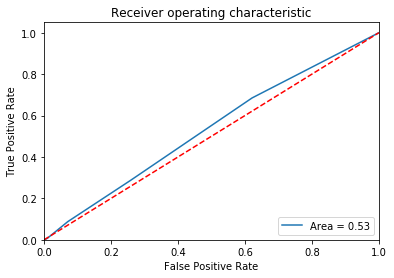

In [126]:
plot_roc(model_5,X_test,Y_test)

## SVC

In [39]:
from sklearn.svm import LinearSVC

In [40]:
model_6 = LinearSVC()
model_6.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
model_accuracy(model_6,X_test,Y_test)

Accuracy:  78.85
Confusion matrix:
[[1547   53]
 [ 370   30]]
ROC:  0.5209375
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1600
           1       0.36      0.07      0.12       400

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



## GB

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
model_7 = GradientBoostingClassifier()
model_7.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
model_accuracy(model_7,X_test,Y_test)

Accuracy:  82.15
Confusion matrix:
[[1551   49]
 [ 308   92]]
ROC:  0.5996875
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1600
           1       0.65      0.23      0.34       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000



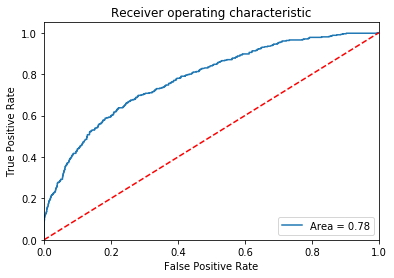

In [124]:
plot_roc(model_7,X_test,Y_test)

In [139]:
from sklearn.naive_bayes import GaussianNB

In [153]:
model_8 = GaussianNB()
model_8.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
model_accuracy(model_8,X_test,Y_test)

Accuracy:  0.653
Confusion matrix:
[[1162  438]
 [ 256  144]]
ROC:  0.543125
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1600
           1       0.25      0.36      0.29       400

   micro avg       0.65      0.65      0.65      2000
   macro avg       0.53      0.54      0.53      2000
weighted avg       0.71      0.65      0.67      2000



In [155]:
model_8a = GaussianNB()
model_8a.fit(X_train_scale, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [156]:
model_accuracy(model_8a,X_test_scale,Y_test)

Accuracy:  0.751
Confusion matrix:
[[1452  148]
 [ 350   50]]
ROC:  0.51625
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1600
           1       0.25      0.12      0.17       400

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.53      0.52      0.51      2000
weighted avg       0.70      0.75      0.72      2000



## Gridsearch

In [49]:
from sklearn.model_selection import GridSearchCV

In [60]:
%%time
logit_params = {'C': [.01, .1, 1., 10., 100.]}
logit = LogisticRegression()
gsmodel_1 = GridSearchCV(logit, logit_params, cv=4)
gsmodel_1.fit(X_train, Y_train)

c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\minic

Wall time: 707 ms


c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
model_accuracy(gsmodel_1,X_test,Y_test)

Accuracy:  80.0
Confusion matrix:
[[1600    0]
 [ 400    0]]
ROC:  0.5
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
from sklearn.model_selection import cross_val_score

In [62]:
%%time
# 10-fold cross-validation
logit_scores = cross_val_score(gsmodel_1.best_estimator_, x, y, scoring='accuracy', cv=5)
print (logit_scores)
print (logit_scores.mean())

[0.8   0.8   0.8   0.8   0.799]
0.7998000000000001
Wall time: 193 ms


c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mdv28\appdata\local\continuum\minic

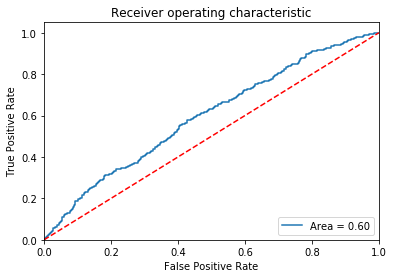

In [123]:
plot_roc(gsmodel_1.best_estimator_,X_test,Y_test)

## Decision tree

In [63]:
model_3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
%%time
tree_params = {'min_samples_split': [2,4, 8, 16], 
               'min_samples_leaf': [1,2, 4, 8]}
gsmodel_2 = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=4)
gsmodel_2.fit(X_train, Y_train)

Wall time: 3.77 s


In [66]:
model_accuracy(gsmodel_2,X_test,Y_test)

Accuracy:  78.7
Confusion matrix:
[[1448  152]
 [ 274  126]]
ROC:  0.61
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1600
           1       0.45      0.32      0.37       400

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.65      0.61      0.62      2000
weighted avg       0.76      0.79      0.77      2000



In [67]:
gsmodel_2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
%%time
# evaluating the model using 10-fold cross-validation
tree_scores = cross_val_score(gsmodel_2.best_estimator_, x, y, scoring='accuracy', cv=5)
print (tree_scores)
print (tree_scores.mean())

[0.7955 0.796  0.7885 0.791  0.7935]
0.7928999999999999
Wall time: 332 ms


In [75]:
zip(x.columns, np.transpose(gsmodel_2.best_estimator_.feature_importances_ )).

In [91]:
# examining the feature importances
pd.DataFrame(index=x.columns, data=np.transpose(gsmodel_2.best_estimator_.feature_importances_ ),columns=['score']).sort_values(by='score',ascending=False).head(20)

,score
CPL_wrt_BC,0.268927
CPL_wrt_self,0.214760
duration,0.202714
avg_budget,0.134120
clicks,0.064907
calls,0.047907
BC_Education & Instruction,0.007685
num_prods,0.007618
BC_Home & Home Improvement,0.007532
"BC_Shopping, Collectibles & Gifts (General)",0.005318


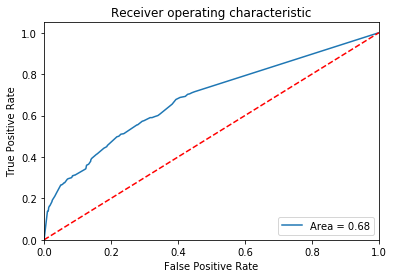

In [122]:
plot_roc(gsmodel_2.best_estimator_,X_test,Y_test)

## Random forest

In [92]:
model_4

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
%%time
forest_params = {'oob_score': [True, False], 
                 'min_samples_split': [2,4,8, 16], 
                 'min_samples_leaf': [1,2,4, 8]}
gsmodel_3 = GridSearchCV(RandomForestClassifier(), forest_params, cv=4)
gsmodel_3.fit(X_train, Y_train)

Wall time: 9.24 s


In [101]:
model_accuracy(gsmodel_3,X_test,Y_test)

Accuracy:  0.8215
Confusion matrix:
[[1561   39]
 [ 318   82]]
ROC:  0.5903125
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1600
           1       0.68      0.20      0.31       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.75      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000



In [102]:
gsmodel_3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [103]:
%%time
# evaluating the model using 5-fold cross-validation
rf_scores = cross_val_score(gsmodel_3.best_estimator_, x, y, scoring='accuracy', cv=5)
print (rf_scores)
print (rf_scores.mean())

[0.823  0.825  0.823  0.828  0.8185]
0.8234999999999999
Wall time: 465 ms


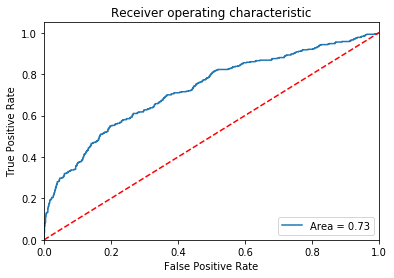

In [121]:
plot_roc(gsmodel_3.best_estimator_,X_test,Y_test)

## GB

In [104]:
model_7

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [105]:
%%time
gb_params = {'subsample': [1., .8, .5]}

gsmodel_4 = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=4)
gsmodel_4.fit(X_train,Y_train)

Wall time: 12.1 s


In [106]:
model_accuracy(gsmodel_4,X_test,Y_test)

Accuracy:  0.822
Confusion matrix:
[[1552   48]
 [ 308   92]]
ROC:  0.6
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1600
           1       0.66      0.23      0.34       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000



In [128]:
model_accuracy(gsmodel_4.best_estimator_,X_test,Y_test)

Accuracy:  0.822
Confusion matrix:
[[1552   48]
 [ 308   92]]
ROC:  0.6
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1600
           1       0.66      0.23      0.34       400

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000



In [107]:
gsmodel_4.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [108]:
%%time
# evaluating the model using 5-fold cross-validation
gb_scores = cross_val_score(gsmodel_4.best_estimator_, x, y, scoring='accuracy', cv=5)
print (gb_scores)
print (gb_scores.mean())

[0.8245 0.8325 0.834  0.835  0.833 ]
0.8318
Wall time: 5.46 s


In [109]:
# examining the feature importances
pd.DataFrame(index=x.columns, data=np.transpose(gsmodel_4.best_estimator_.feature_importances_ ),columns=['score']).sort_values(by='score',ascending=False).head(20)

,score
duration,0.408568
CPL_wrt_self,0.228193
CPL_wrt_BC,0.174965
avg_budget,0.076101
"BC_Shopping, Collectibles & Gifts (General)",0.024920
clicks,0.008456
BC_Education & Instruction,0.008350
BC_Furniture,0.006566
BC_Arts & Entertainment,0.005725
client_state_CT,0.005008


In [111]:
gsmodel_4.best_estimator_.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [117]:
from sklearn.metrics import roc_curve, auc

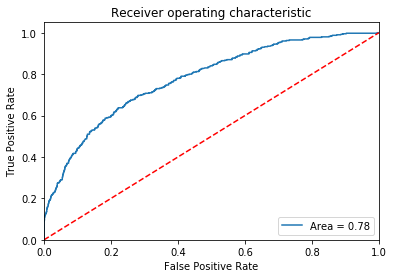

In [120]:
plot_roc(gsmodel_4.best_estimator_,X_test,Y_test)

## Scale data

In [129]:
from sklearn.preprocessing import MinMaxScaler

# Normalize using MinMaxScaler to constrain values to between 0 and 1.

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [131]:
# Logistic Regression
smodel_1 = LogisticRegression()
smodel_1.fit(X_train_scale, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
model_accuracy(smodel_1,X_test_scale,Y_test)

Accuracy:  0.799
Confusion matrix:
[[1598    2]
 [ 400    0]]
ROC:  0.499375
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [133]:
smodel_2 = XGBClassifier()
smodel_2.fit(X_train_scale, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [134]:
model_accuracy(smodel_2,X_test_scale,Y_test)

Accuracy:  0.8275
Confusion matrix:
[[1564   36]
 [ 309   91]]
ROC:  0.6025
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1600
           1       0.72      0.23      0.35       400

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.78      0.60      0.62      2000
weighted avg       0.81      0.83      0.79      2000



In [136]:
smodel_4 = RandomForestClassifier()
smodel_4.fit(X_train_scale, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
model_accuracy(smodel_4,X_test_scale,Y_test)

Accuracy:  0.8105
Confusion matrix:
[[1547   53]
 [ 326   74]]
ROC:  0.5759375000000001
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1600
           1       0.58      0.18      0.28       400

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

